## Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге за несколько лет. 

По каждой продаваемой квартире у нас есть два вида данных. Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра, аэропорта, ближайшего парка и водоёма.

Описание данных (добавим подходящий тип данных):
-  airports_nearest — расстояние до ближайшего аэропорта в метрах (м) - float
-  balcony — число балконов - int
-  ceiling_height — высота потолков (м) - float
-  cityCenters_nearest — расстояние до центра города (м) - float
-  days_exposition — сколько дней было размещено объявление (от публикации до снятия) - int
-  first_day_exposition — дата публикации -date
-  floor — этаж - int
-  floors_total — всего этажей в доме -int
-  is_apartment — апартаменты (булев тип) - bool
-  kitchen_area — площадь кухни (м²) - float
-  last_price — цена на момент снятия с публикации - float
-  living_area — жилая площадь (м²) - float
-  locality_name — название населённого пункта - string
-  open_plan — свободная планировка (булев тип) - bool
-  parks_around3000 — число парков в радиусе 3 км - int 
-  parks_nearest — расстояние до ближайшего парка (м) - float
-  ponds_around3000 — число водоёмов в радиусе 3 км - int
-  ponds_nearest — расстояние до ближайшего водоёма (м) - float
-  rooms — число комнат - int
-  studio — квартира-студия (булев тип) - bool
-  total_area — площадь квартиры в квадратных метрах (м²) - float
-  total_images — число фотографий квартиры в объявлении- int

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('real_estate.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

# Этап 1. Подготовка данных

In [3]:
# Переведем начальные данные в рабочий датафрейм

df = data
# Посмотрим, что лежит в building_series_id

df['building_series_id'].value_counts()

1564812.0               2807
1564812                  998
1564792.0                374
1564801.0                311
1564806.0                175
1568627.0                144
1569071.0                133
1564792                  133
1564796.0                116
1564801                   92
1569033.0                 87
1564806                   67
1569038.0                 62
Кирпичный                 60
1568627                   52
Кирп.Монолит              47
1569066.0                 46
1564796                   44
1569071                   40
1568734.0                 37
1569033                   32
1568675.0                 28
1568643.0                 26
1569054.0                 24
1569088.0                 23
1569038                   23
Старый фонд с КР          22
Старый фонд               22
137 серия                 21
137                       19
                        ... 
100                        2
Бесшовная технология       2
старый фонд                2
ОД-6          

В столбце *building_series_id* необходимо:
-  перевести все к типу string.
-  провести унификацию. Например *Кирпичный монолит* и *Кирп.Монолит*, а также *121(гатчинская)* и *121 гатчинская* явно описывают одинаковые дома.
-  выяснить, что означают числовые коды.
-  ввести словарь типов зданий
-  все что не входит в словарь сделать типом "Не определено"

Далее мы введем словарь типов зданий. Возможно, он будет очень не полным и много зданий уйдет в тип "Не определено". Что ж будем иметь это ввиду при дальнейшем анализе.

Когда мы получим более совершенный словарь, эту часть можно будет переделать

In [4]:
build_dict = {'series_id': ['Х', 'ИНД','СФ','СФ КР','КИРП','МОН','СТ','П','МП','БР','БЛ','БЛМ','Р','НО','КРМ'], 
              'series_name': ['Хрущевка', 'Индивидуальный','Старый Фонд','Старый фонд с кап. ремонтом','Кирпичный','Монолитный','Сталинский','Панельный','Монолитно-панельный',
                              'Брежневка','Блочный','Блочно-монолитный','Реконструкция','Не определено','Кирпично-Монолитный']}
building_series_dict = pd.DataFrame(data=build_dict)

df['building_series_id'] = df['building_series_id'].apply(str).replace(r'\s+','',regex=True)
df['building_series_id'] = df['building_series_id'].str.lower()
df['building_series_id'].replace('хрущевка', 'Х', inplace=True)
df['building_series_id'].replace('хрущ.', 'Х', inplace=True)

df['building_series_id'].replace('старыйфонд', 'СФ', inplace=True)
df['building_series_id'].replace('стар.фонд', 'СФ', inplace=True)
df['building_series_id'].replace('старыйфондбезкр', 'СФ', inplace=True)

df['building_series_id'].replace('старыйфондскр', 'СФ КР', inplace=True)
df['building_series_id'].replace('стар.фондскр', 'СФ КР', inplace=True)
df['building_series_id'].replace('старыйфонд+капремонт', 'СФ КР', inplace=True)

df['building_series_id'].replace('индивидуальный', 'ИНД', inplace=True)
df['building_series_id'].replace('инд.', 'ИНД', inplace=True)
df['building_series_id'].replace('индивид.', 'ИНД', inplace=True)
df['building_series_id'].replace('индивидуальныйпроект', 'ИНД', inplace=True)

df['building_series_id'].replace('кирпичный', 'КР', inplace=True)
df['building_series_id'].replace('кирп.', 'КР', inplace=True)

df['building_series_id'].replace('монолит', 'МОН', inplace=True)
df['building_series_id'].replace('мон', 'МОН', inplace=True)
df['building_series_id'].replace('кирпичныймонолит', 'КРМ', inplace=True) 
df['building_series_id'].replace('кирп.монолит', 'КРМ', inplace=True)

df['building_series_id'].replace('сталинский', 'С', inplace=True)
df['building_series_id'].replace('1лг-600.11 ', 'П', inplace=True)
df['building_series_id'].replace('1-лг-600-i', 'П', inplace=True)
df['building_series_id'].replace('панельный', 'П', inplace=True)
df['building_series_id'].replace('137', 'П', inplace=True)
df['building_series_id'].replace('137серия', 'П', inplace=True)
df['building_series_id'].replace('1лг-6066м', 'П', inplace=True)

df['building_series_id'].replace('блочный', 'БЛ', inplace=True) 
df['building_series_id'].replace('г-2и', 'БЛ', inplace=True) 
df['building_series_id'].replace('1лг-502', 'БР', inplace=True)
df['building_series_id'].replace('брежневка', 'БР', inplace=True)
df['building_series_id'].replace('корабль', 'П', inplace=True)
df['building_series_id'].replace('монол.панельный', 'БЛМ', inplace=True)

df['building_series_id'] = df['building_series_id'].where(df['building_series_id'].isin(building_series_dict['series_id']), 'НО')

df['building_series_id'].value_counts()


НО       23448
П           68
КРМ         54
СФ          31
СФ КР       26
БР          16
МОН         14
БЛ          13
ИНД         13
Х           12
БЛМ          4
Name: building_series_id, dtype: int64

Вот, с серией разобрались...

Заменим пропуски:
- ceiling_height на среднее (высота потолков скорее всего одно из стандартных значений)
- floors_total на среднее (высота дома > 0, скорее всего одно из  стандартных значений 5, 9, 10, 14..., возьмем стреднее)
- living_area на среднее (жилая площадь > 0, возьмем среднее)
- is_apartment на False (если не указано, что это аппартаменты, скорее всего это не аппартаменты)
- kitchen_area на среднее (площадь кухни > 0, возьмем среднее)
- balcony на 0 (если не указано количество балконов, будем считать, что их нет)
- locality_name на "Не определено"
- airports_nearest на среднее (расстояние до аэрапорта > 0, возьмем среднее, т.к. все объекты из Питера и окрестностей, ориентируемся на один аэропорт)
- cityCenters_nearest  на среднее (расстояние доцентра > 0, возьмем среднее)
- parks_around3000 на 0 (если не указано количество парков поблизости, будем считать, что их нет)
- parks_nearest на среднее (обычно не указано, когда поблизости нет парков, будем считать, что расстояние до ближайшего среднее)
- ponds_around3000 на 0 (если не указано количество водоемов поблизости, будем считать, что их нет)
- ponds_nearest на среднее (обычно не указано, когда поблизости нет водоемов, будем считать, что расстояние до ближайшего среднее)
- days_exposition на среднее

Теперь переведем столбцы, которые должны быть целочисленными к типу INT

first_day_exposition переведем в datetime, оставив только дату, время не нужно

is_apartment - в bool
 

In [5]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
df['living_area'] = df['living_area'].fillna(df['living_area'].mean())
df['is_apartment'] = df['is_apartment'].fillna(False)
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mean())
df['locality_name'] = df['locality_name'].fillna('Не определено')
df['balcony'] = df['balcony'].fillna(0)
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].mean())
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].mean())
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].mean())
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].mean())
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].mean())

df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int') 
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['first_day_exposition'] = df['first_day_exposition'].apply(lambda x: x[:10])
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int32
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int32
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around

Все привели данные в порядок. 

Посмотрим на данные еще раз.

In [6]:
df.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,НО,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.0000,180
1,НО,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.600000,1,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0,490.804555,0,517.9809,81
2,НО,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.300000,4,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.0000,558
3,НО,0,64900000.0,159.0,2015-07-24,3,2.771499,14,34.457852,9,...,10.569807,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.0000,424
4,НО,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.0000,121


Теперь добавим новые столбцы:
-  цену квадратного метра;
-  день недели, месяц и год публикации объявления;
-  этаж, на котором расположена квартира; варианты — первый, последний, другой;
-  соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [7]:

df['price_per_meter'] = df['last_price'] / df['total_area']
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['floor_type'] = np.where(df['floor'] == df['floors_total'], 'последний', np.where(df['floor'] == 1, 'первый', 'другой'))
df['living_to_total'] =  df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']
df.head()


,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,living_to_total,kitchen_to_total
0,НО,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,...,2,755.0000,180,120370.370370,3,3,2019,другой,0.472222,0.231481
1,НО,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.600000,1,...,0,517.9809,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,НО,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.300000,4,...,2,574.0000,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,НО,0,64900000.0,159.0,2015-07-24,3,2.771499,14,34.457852,9,...,3,234.0000,424,408176.100629,4,7,2015,другой,0.216716,0.066477
4,НО,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,...,1,48.0000,121,100000.000000,1,6,2018,другой,0.320000,0.410000


Все получили готовую для анализа таблицу

# Этап 2. Поиск аномалий

Посмотрим цены, площади квартир, а также количество дней, которое объявление было активно.

Поищем аномально большие значения и исключим их из анализа.

### Построим ящики с усами

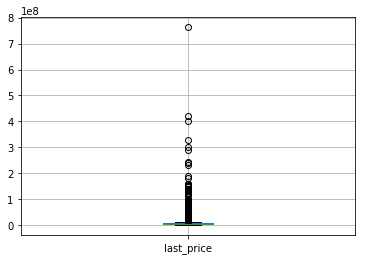

In [9]:
import matplotlib.pyplot as plt

df.boxplot(column=['last_price'])

(1000000, 10000000)

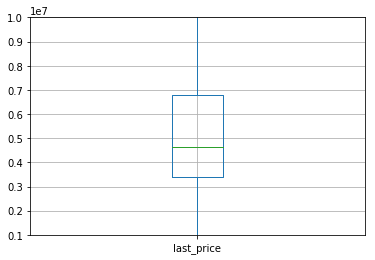

In [10]:
df.boxplot(column=['last_price'])
plt.ylim(1000000, 10000000)

Основные цены лежат между 3 и 7 млн.

Хотя есть некоторые очень маленькие (близкие к 0) значения  и  аномально большие 200 - 800 млн.

In [11]:
low_price = df.query('last_price < 500000')
high_price = df.query('last_price > 200000000')

low_price.head(20)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,living_to_total,kitchen_to_total
5698,НО,7,450000.0,42.0,2017-07-31,2,2.771499,1,23.000000,1,...,0,517.9809,233,10714.285714,0,7,2017,последний,0.547619,0.138095
6859,НО,6,490000.0,40.0,2017-12-11,1,2.771499,5,34.457852,3,...,0,517.9809,43,12250.000000,0,12,2017,другой,0.861446,0.264245
8793,НО,7,12190.0,109.0,2019-03-20,2,2.750000,25,32.000000,25,...,0,517.9809,8,111.834862,2,3,2019,последний,0.293578,0.371560
9581,НО,7,450000.0,43.4,2018-08-31,2,2.771499,5,30.300000,3,...,0,517.9809,96,10368.663594,4,8,2018,другой,0.698157,0.126728
10782,НО,3,490000.0,29.1,2016-05-05,1,2.500000,5,17.000000,5,...,0,517.9809,719,16838.487973,3,5,2016,последний,0.584192,0.189003
14911,НО,5,430000.0,54.0,2018-06-26,2,2.771499,3,34.457852,3,...,0,517.9809,44,7962.962963,1,6,2018,последний,0.638108,0.195737
16032,НО,8,480000.0,32.0,2019-01-06,1,2.771499,2,16.000000,1,...,0,517.9809,83,15000.000000,6,1,2019,первый,0.500000,0.330306
16219,НО,14,450000.0,38.5,2018-07-11,2,2.650000,2,34.457852,1,...,0,517.9809,45,11688.311688,2,7,2018,первый,0.895009,0.274540
16274,НО,18,440000.0,40.0,2018-07-10,1,2.771499,5,34.457852,1,...,0,517.9809,45,11000.000000,1,7,2018,первый,0.861446,0.264245
17456,НО,7,430000.0,30.4,2019-04-22,1,2.771499,2,16.000000,1,...,0,517.9809,180,14144.736842,0,4,2019,первый,0.526316,0.197368


In [12]:
high_price.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,living_to_total,kitchen_to_total
1436,НО,19,330000000.0,190.0,2018-04-04,3,3.500000,7,95.000000,5,...,3,285.0,233,1.736842e+06,2,4,2018,другой,0.500000,0.210526
5893,НО,3,230000000.0,500.0,2017-05-31,6,2.771499,7,34.457852,7,...,2,198.0,50,4.600000e+05,2,5,2017,последний,0.068916,0.080000
12971,НО,19,763000000.0,400.0,2017-09-30,7,2.771499,10,250.000000,10,...,3,756.0,33,1.907500e+06,5,9,2017,последний,0.625000,0.026425
13749,НО,7,240000000.0,410.0,2017-04-01,6,3.400000,7,218.000000,7,...,2,198.0,199,5.853659e+05,5,4,2017,последний,0.531707,0.097561
14706,НО,15,401300000.0,401.0,2016-02-20,5,2.771499,9,204.000000,9,...,1,478.0,393,1.000748e+06,5,2,2016,последний,0.508728,0.059850
15651,НО,20,300000000.0,618.0,2017-12-18,7,3.400000,7,258.000000,5,...,2,198.0,111,4.854369e+05,0,12,2017,другой,0.417476,0.113269
16461,НО,17,245000000.0,285.7,2017-04-10,6,3.350000,7,182.800000,4,...,3,140.0,249,8.575429e+05,0,4,2017,другой,0.639832,0.104305
19540,НО,8,420000000.0,900.0,2017-12-06,12,2.800000,25,409.700000,25,...,2,318.0,106,4.666667e+05,2,12,2017,последний,0.455222,0.124444
22831,НО,18,289238400.0,187.5,2019-03-19,2,3.370000,6,63.700000,6,...,3,188.0,180,1.542605e+06,1,3,2019,последний,0.339733,0.161067


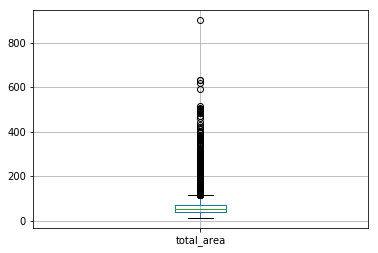

In [13]:
df.boxplot(column=['total_area'])

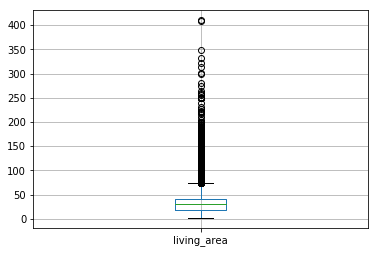

In [14]:
df.boxplot(column=['living_area'])

In [20]:
print(df['total_area'].quantile(.05))
print(df['total_area'].quantile(.95))

31.0
116.0


In [21]:
max_area = df.query('total_area > 120')
min_area = df.query('total_area < 30')
max_area.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,living_to_total,kitchen_to_total
3,НО,0,64900000.0,159.0,2015-07-24,3,2.771499,14,34.457852,9,...,3,234.0000,424,408176.100629,4,7,2015,другой,0.216716,0.066477
19,НО,16,14200000.0,121.0,2019-01-09,3,2.750000,16,76.000000,8,...,0,517.9809,97,117355.371901,2,1,2019,другой,0.628099,0.099174
35,НО,6,15500000.0,149.0,2017-06-26,5,2.771499,5,104.000000,4,...,1,779.0000,644,104026.845638,0,6,2017,другой,0.697987,0.114094
42,НО,13,22000000.0,161.8,2015-07-08,4,2.800000,4,80.900000,2,...,1,907.0000,987,135970.333745,2,7,2015,другой,0.500000,0.108776
51,НО,7,45000000.0,161.0,2017-10-17,3,3.200000,8,38.000000,4,...,3,99.0000,541,279503.105590,1,10,2017,другой,0.236025,0.310559
52,НО,20,11795000.0,136.0,2017-09-22,6,3.000000,2,94.000000,2,...,0,517.9809,180,86727.941176,4,9,2017,последний,0.691176,0.080882
97,НО,15,4898000.0,146.0,2019-02-12,4,2.771499,2,77.000000,2,...,0,517.9809,34,33547.945205,1,2,2019,последний,0.527397,0.089041
106,НО,9,10500000.0,124.1,2017-05-25,5,3.200000,4,79.400000,3,...,0,517.9809,6,84609.186140,3,5,2017,другой,0.639807,0.161160
121,НО,20,33000000.0,180.0,2017-02-17,3,2.900000,9,86.000000,8,...,0,517.9809,144,183333.333333,4,2,2017,другой,0.477778,0.133333
147,НО,10,27700000.0,179.6,2017-07-06,5,2.850000,25,97.200000,25,...,1,806.0000,75,154231.625835,3,7,2017,последний,0.541203,0.188196


In [22]:
min_area.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,living_to_total,kitchen_to_total
94,НО,3,3500000.0,29.50,2019-04-26,1,2.500000,5,15.600000,2,...,0,517.9809,4,118644.067797,4,4,2019,другой,0.528814,0.186441
114,НО,5,4000000.0,21.40,2019-02-07,1,2.900000,8,8.300000,7,...,1,286.0000,180,186915.887850,3,2,2019,другой,0.387850,0.294393
144,НО,1,2450000.0,27.00,2017-03-30,0,2.771499,24,15.500000,2,...,0,517.9809,181,90740.740741,3,3,2017,другой,0.574074,0.391474
237,НО,4,2438033.0,28.10,2016-11-23,1,2.771499,10,20.750000,1,...,1,374.0000,251,86762.740214,2,11,2016,первый,0.738434,0.376150
296,НО,4,1690000.0,28.00,2017-08-09,1,2.771499,5,17.000000,1,...,0,517.9809,14,60357.142857,2,8,2017,первый,0.607143,0.214286
317,НО,9,3050000.0,29.40,2018-02-27,1,2.771499,5,15.100000,4,...,1,565.0000,225,103741.496599,1,2,2018,другой,0.513605,0.248299
322,НО,6,2000000.0,25.00,2017-02-07,1,2.771499,5,34.457852,5,...,0,517.9809,45,80000.000000,1,2,2017,последний,1.378314,0.422792
349,НО,4,2320000.0,25.00,2017-09-27,0,2.771499,14,17.000000,1,...,0,517.9809,45,92800.000000,2,9,2017,первый,0.680000,0.422792
366,НО,10,3400000.0,29.90,2017-12-21,1,2.500000,5,15.400000,5,...,0,517.9809,103,113712.374582,3,12,2017,последний,0.515050,0.240803
440,НО,8,2480000.0,27.11,2018-03-12,0,2.771499,17,24.750000,4,...,2,982.0000,64,91479.158982,0,3,2018,другой,0.912947,0.389886


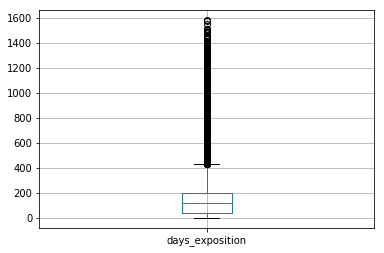

In [23]:
df.boxplot(column=['days_exposition'])

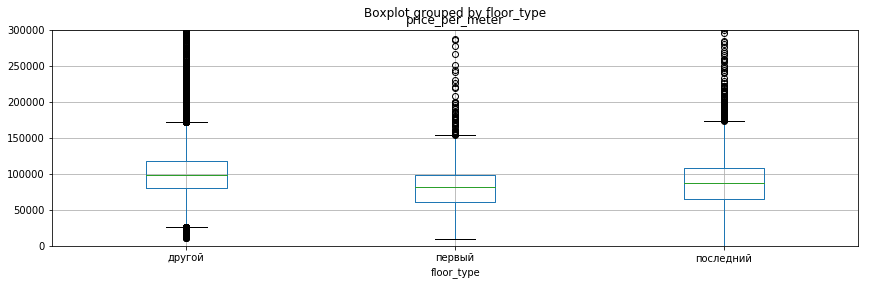

In [26]:
ax = (data.boxplot('price_per_meter', by='floor_type', figsize=(14, 4)))
ax.set_ylim(0, 300000);

Анализируя ящики, получаем:
-  реально только одна аномалия - квартира за 12 тысяч рублей
-  да, есть Дональды Трампы среди квартир, но в принципе это вполне реальные данные. Да, квартира 12 комнат, 900 кв. стоимостью 420 млн, уникально, но она вполне может существовать.
-  площади квартир указаны вполне корректно
-  дни активности объявлений вполне реальны. Да, некоторые квартиры продавались по 4 года, но это не 100500 лет и сомневаться в правильности этих данных нет причин.

Исходя из этого, дальше делаем следующее:
-  удаляем аномально дешевую квартиру
-  выделяем "усредненный" датафрейм с квартирами от 1 до 20 млн.
-  работаем с двумя массивами и смотрим, как влияет отброшенный хвост

In [27]:
df = df.query('last_price > 15000')
df.shape

(23698, 31)

In [28]:
df_av_price = df.query('last_price > 1000000 and last_price < 20000000')
df_elite = df.query('last_price > 20000000')
df_chip = df.query('last_price < 1000000')
df_av_price.shape

(22731, 31)

Мы отсеяли примерно 4% вполне приемлимо.
Посмотрим, что мы получили за выборку.
Нарисуем новые ящики с усами.

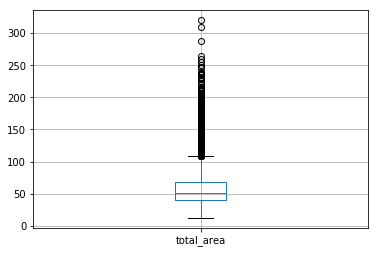

In [29]:
df_av_price.boxplot(column=['total_area'])

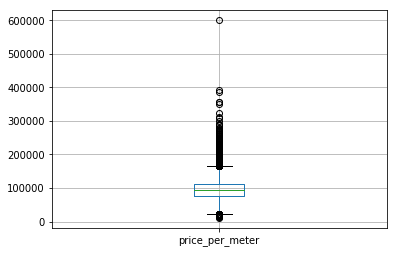

In [30]:
df_av_price.boxplot(column=['price_per_meter'])

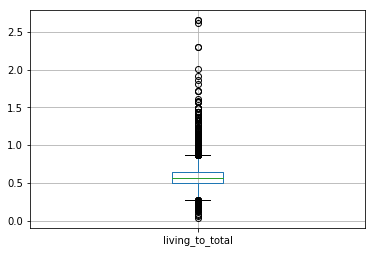

In [31]:
df_av_price.boxplot(column=['living_to_total'])

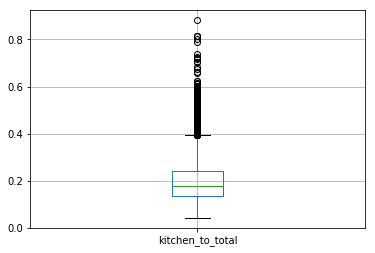

In [32]:
df_av_price.boxplot(column=['kitchen_to_total'])

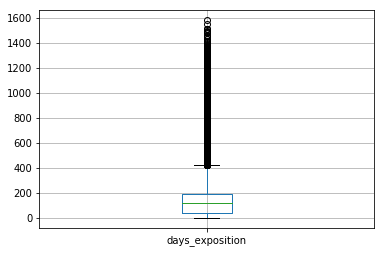

In [33]:
df_av_price.boxplot(column=['days_exposition'])

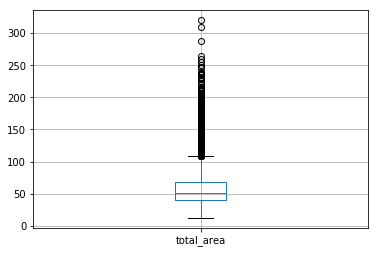

In [34]:
df_av_price.boxplot(column=['total_area'])

Остался один явный выброс - одна квартира с аномальной ценой за кв. метр. Выбросим ее из обоих датасетов.

In [35]:
df_av_price = df_av_price.query('price_per_meter < 400000')
df = df.query('price_per_meter < 400000')

## Шаг 3. Анализ корреляции

Посмотрим корреляцию всех переменных в датасете

In [36]:
df_av_price.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,living_to_total,kitchen_to_total
total_images,1.000000,0.152150,0.098689,0.083637,-0.000101,0.013945,0.079464,0.032228,0.012855,-0.028733,...,-0.002783,-0.002595,0.004689,-0.031424,0.129054,-0.008061,0.005160,0.147692,-0.039431,-0.058055
last_price,0.152150,1.000000,0.774808,0.515519,0.092470,0.096376,0.639245,0.080611,0.019701,-0.060577,...,0.040304,0.291409,-0.056291,0.108608,0.617452,-0.014032,0.002214,-0.024941,-0.085652,-0.197241
total_area,0.098689,0.774808,1.000000,0.798328,0.083512,-0.058914,0.887027,-0.037304,0.016702,-0.095202,...,0.004383,0.159051,-0.036951,0.133824,0.038230,-0.011487,0.002406,-0.074988,0.014069,-0.435115
rooms,0.083637,0.515519,0.798328,1.000000,0.039428,-0.232402,0.843644,-0.166302,-0.001602,-0.159033,...,-0.027475,0.081052,-0.016633,0.102337,-0.142002,-0.002631,-0.007087,-0.046112,0.270001,-0.640127
ceiling_height,-0.000101,0.092470,0.083512,0.039428,1.000000,-0.016760,0.077089,-0.008057,0.073576,0.002966,...,-0.004872,0.051251,-0.026649,0.014796,0.049226,-0.006382,-0.002631,-0.013134,0.001630,0.004112
floors_total,0.013945,0.096376,-0.058914,-0.232402,-0.016760,1.000000,-0.170134,0.671188,-0.024298,0.069630,...,0.045832,-0.046711,0.019420,-0.045369,0.273406,0.013487,0.014730,0.006403,-0.255838,0.341740
living_area,0.079464,0.639245,0.887027,0.843644,0.077089,-0.170134,1.000000,-0.116101,0.006663,-0.063798,...,-0.022048,0.129588,-0.025112,0.115694,-0.045264,-0.004853,-0.009032,-0.060418,0.407811,-0.527338
floor,0.032228,0.080611,-0.037304,-0.166302,-0.008057,0.671188,-0.116101,1.000000,-0.014197,0.037430,...,0.034934,-0.032273,0.014062,-0.037101,0.206367,0.012643,0.017109,0.005878,-0.185448,0.239052
is_apartment,0.012855,0.019701,0.016702,-0.001602,0.073576,-0.024298,0.006663,-0.014197,1.000000,-0.003483,...,-0.010654,0.013121,0.006915,-0.003327,0.018927,-0.008474,-0.004385,0.022141,-0.003645,0.006295
studio,-0.028733,-0.060577,-0.095202,-0.159033,0.002966,0.069630,-0.063798,0.037430,-0.003483,1.000000,...,0.003126,-0.007840,0.000379,-0.020664,0.036040,0.000043,0.000524,0.012038,0.093204,0.214178


Можно подтвердить очевидные факты:
- сильнее всего на цену влияет площадь (все виды площади)
- как следствие площади -  количество комнат.
- расстояние до центра в значительно меньшей степени, чем площадь
- наличие парков и водоемов (почти также как и расстояние до центра)

На цену за квадратный метр влияют (все факторы практически в равной степени):
- этаж
- количество этажей в доме
- площадь кухни
- расстояние до центра
- количество парков и водоемов

Из описанного выше видно, что нам очень не хватает такого параметра как *год постройки*. Очевидно, что цена за кв. метр сильно зависит от этого параметра, а в нашем датасете зависит от опосредованного параметра - количества этажей (более высокие здания обычно более новые).

Нарисуем для наглядности.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000096FE828>,
      dtype=object)

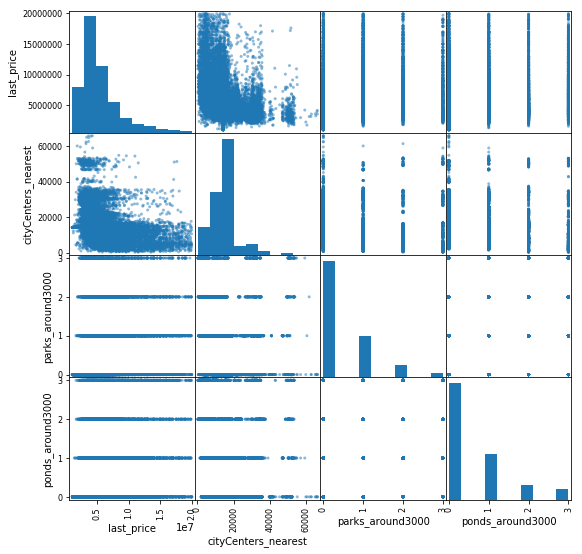

In [37]:
df_for_graph = df_av_price.loc[:,['last_price', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']]
pd.plotting.scatter_matrix(df_for_graph, figsize=(9, 9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C77A7B8>,
      dtype=object)

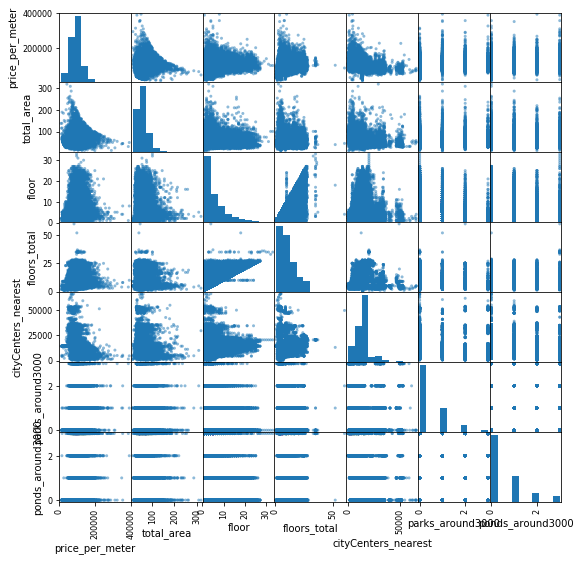

In [38]:
df_for_graph_per_meter = df_av_price.loc[:,['price_per_meter', 'total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']]
pd.plotting.scatter_matrix(df_for_graph_per_meter, figsize=(9, 9))

## Шаг 4. Анализ групп.

In [39]:
df_location = df_av_price.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count'])
df_location .columns = ['mean_price', 'count']
df_location.sort_values('count', ascending=False).head(10)

,mean_price,count
locality_name,,
Санкт-Петербург,108582.556911,15015
посёлок Мурино,85752.189195,522
посёлок Шушары,78677.364217,440
Всеволожск,67275.592779,396
Пушкин,101788.572053,360
Колпино,75333.295801,337
посёлок Парголово,90175.913458,327
Гатчина,68935.194838,306
деревня Кудрово,92473.547576,299


In [40]:
df_location.sort_values('mean_price', ascending=False).head(10)

,mean_price,count
locality_name,,
посёлок Лисий Нос,121616.221359,2
Санкт-Петербург,108582.556911,15015
Зеленогорск,106043.631251,23
Пушкин,101788.572053,360
Сестрорецк,101331.346402,182
Кудрово,100253.043304,173
деревня Мистолово,98549.976709,11
посёлок Левашово,96997.690531,1
Мурино,92722.708914,34


подавляющее большинство объявлений из Питера, но есть и соседние поселки, где объявлений тоже достаточно для анализа и сравнения.

Причем средняя цена за кв. метр, например, в Пушкине не стльно отличается от Питерской (более 100 тыс. за кв. м.)
Есть и другие н.п. - посёлок Парголово и деревня Кудрово, в которых цена за кв. м. превышает 90 тыс.
При этом такие крупные н.п. как Выборг сильно отстают - цена за кв.м. не достигает и 60 тыс.

Лидером является посёлок Лисий Нос (121616 тыс за кв.м.), но там васего 2 объявления - слишком маленькая статистика.

Кстати, здесь мы увидели, что в столбце *locality_name* скорее всего есть "скрытые" дубликаты, например, Кудрово и деревня Кудрово. Но, это надо уточнять, в принципе это могут быть разные н.п., например район Кудрово и деревня Кудрово, похожие названия не редкость...

#### Теперь рассмотрим такие группы как студии, квартиры с индивидуальной планировкой и аппартаменты 

In [41]:
df_studio = df.query('studio == True')
df_studio.shape

(149, 31)

In [42]:
df_apartment = df.query('is_apartment == True')
df_apartment.shape

(47, 31)

In [43]:
df_ind = df.query('building_series_id == "ИНД"')
df_ind.shape

(13, 31)

Студий всего 149, аппартаментов всего 47, а скартир с индивидуальной планировкой вообще 13. Не много для статистики, но все равно посмотрим.

In [44]:
print('Средняя цена за кв м квартир - ', df['price_per_meter'].mean())
print('Средняя цена за кв м в отфильтрованной выборке - ', df_av_price['price_per_meter'].mean())
print('Средняя цена за кв м студии - ', df_studio['price_per_meter'].mean())
print('Средняя цена за кв м апартаментов - ',df_apartment['price_per_meter'].mean())
print('Средняя цена за кв м инд. план. - ',df_ind['price_per_meter'].mean())

Средняя цена за кв м квартир -  97789.7721048153
Средняя цена за кв м в отфильтрованной выборке -  95581.92387506273
Средняя цена за кв м студии -  109310.7921326259
Средняя цена за кв м апартаментов -  124393.85789655209
Средняя цена за кв м инд. план. -  103096.10354466495


In [45]:
print('Среднее расстояние до центра от квартир - ', df['cityCenters_nearest'].mean())
print('Среднее расстояние до центра в отфильтрованной выборке - ', df_av_price['cityCenters_nearest'].mean())
print('Среднее расстояние до центра от студии - ', df_studio['cityCenters_nearest'].mean())
print('Среднее расстояние до центра от апартаментов - ',df_apartment['cityCenters_nearest'].mean())
print('Среднее расстояние до центра от инд. план. - ',df_ind['cityCenters_nearest'].mean())

Среднее расстояние до центра от квартир -  14223.686334122394
Среднее расстояние до центра в отфильтрованной выборке -  14430.71799923485
Среднее расстояние до центра от студии -  13667.415009856695
Среднее расстояние до центра от апартаментов -  15510.913719776236
Среднее расстояние до центра от инд. план. -  15564.76923076923


In [46]:
print('Средняя общая площадь квартир - ', df['total_area'].mean())
print('Средняя общая площадь в отфильтрованной выборке - ', df_av_price['total_area'].mean())
print('Средняя общая площадь студии - ', df_studio['total_area'].mean())
print('Средняя общая площадь апартаментов - ',df_apartment['total_area'].mean())
print('Средняя общая площадь инд. план. - ',df_ind['total_area'].mean())

Средняя общая площадь квартир -  59.899274313052864
Средняя общая площадь в отфильтрованной выборке -  56.84081742190921
Средняя общая площадь студии -  27.78315436241611
Средняя общая площадь апартаментов -  84.10404255319149
Средняя общая площадь инд. план. -  67.44


Мы видим, что средняя цена за кв. метр для всех выбранных групп выше, чем в среднем по выборке (даже для неотфильтрованной выборке, в которой есть Дональды Трампы среди квартир), больше 100 тыс за кв.м, а для апартаментов - больше 120 тыс.
При этом расстояние до центра значительно не отличается от общей выборки, для аппартаментов и квртир с инд. планировкой даже больше почти на 1км.
При этом средняя площадь у студии, как и ожидается - маленькая - всего 28 кв.м., а у квртир с инд. планировкой больше, чем у общей выдорке (67 против 57 кв. м.), а у аппартаментов вообще рекордные - 84 кв.м.

Полученные результаты позволяют предположить, что на цену за кв.м. по прежднему больше всего влияет не данный нам параметр - год постройки. Квартиры инд. планировок, студии и апартаменты - обычно характерны для новых зданий и пэтому стоят дороже. Также видно, что большие квартиры (такие как аппартаменты) стоят дороже (за кв.м.), чем более маленькие (такие как студии).

#### Теперь рассмотрим влияние первого и последнего этажа

In [47]:
df_first=df_av_price.query('floor_type == "первый"')
df_last=df_av_price.query('floor_type == "последний"')
df_other=df_av_price.query('floor_type == "другой"')
print('Средняя цена за кв м на первом этаже - ', df_first['price_per_meter'].mean())
print('Средняя цена за кв м на последнем этаже - ',df_last['price_per_meter'].mean())
print('Средняя цена за кв м других этажей - ',df_other['price_per_meter'].mean())

Средняя цена за кв м на первом этаже -  81926.98324805406
Средняя цена за кв м на последнем этаже -  87781.51668273122
Средняя цена за кв м других этажей -  99290.67918275642


Да, первый этаж сильно душевле (ср. цена за кв метр почти на 20 тыс меньше, чем у других этажей), последний этаж "отстает" меньше на 12 тыс за кв. м.

#### Посмотрим скорость продажи квартир

Выдели еще несколько категорий:
-  по удаленности от центра (больше 10000 и меньше)
-  по цене (дешевые < 3 млн, дорогие> 15 млн, и др.)

In [48]:
df_center = df_av_price.query('cityCenters_nearest < 10000')
df_far = df_av_price.query('cityCenters_nearest >= 10000')
df_chip = df_av_price.query('last_price < 3000000')
df_exp = df_av_price.query('last_price > 15000000')
df_norm = df_av_price.query('last_price >= 3000000 and last_price < 15000000')

In [49]:
# Среднее время продажи
print('Среднее время продажи квартир - ', df['days_exposition'].mean())
print('Среднее время продажи квартир  в отфильтрованной выборке - ', df_av_price['days_exposition'].mean())
print('Среднее время продажи квартир  в центре - ', df_center['days_exposition'].mean())
print('Среднее время продажи квартир вдали от центра - ',df_far['days_exposition'].mean())
print('Среднее время продажи дешевых квартир - ',df_chip['days_exposition'].mean())
print('Среднее время продажи дорогих квартир - ',df_exp['days_exposition'].mean())
print('Среднее время продажи квартир по средней цене - ',df_norm['days_exposition'].mean())
print('Средняя время продажи квартир на первом этаже - ', df_first['days_exposition'].mean())
print('Средняя цвремя продажи квартир на последнем этаже - ',df_last['days_exposition'].mean())
print('Средняя время продажи квартир других этажей - ',df_other['days_exposition'].mean())
print('Средняя время продажистудии - ', df_studio['days_exposition'].mean())
print('Средняя время продажи апартаментов - ',df_apartment['days_exposition'].mean())
print('Средняя время продажи инд. план. - ',df_ind['days_exposition'].mean())

Среднее время продажи квартир -  180.45679325966384
Среднее время продажи квартир  в отфильтрованной выборке -  178.31913770347558
Среднее время продажи квартир  в центре -  213.99219620958752
Среднее время продажи квартир вдали от центра -  169.54995889284734
Среднее время продажи дешевых квартир -  167.974064171123
Среднее время продажи дорогих квартир -  243.88357588357587
Среднее время продажи квартир по средней цене -  178.57258108181276
Средняя время продажи квартир на первом этаже -  199.58486486486487
Средняя цвремя продажи квартир на последнем этаже -  186.86201402166986
Средняя время продажи квартир других этажей -  173.21597193316288
Средняя время продажистудии -  125.8255033557047
Средняя время продажи апартаментов -  229.0
Средняя время продажи инд. план. -  146.07692307692307


Быстро продяются дешевые квартиры, вдали от центра не на первом или последнем этаже, особенно студии или квартиры инд. планировки.
Тяжелее будет продать квартиры в центре, дорогие аппартаменты, особенно на первом этаже.

#### Нарисуем для наглядности

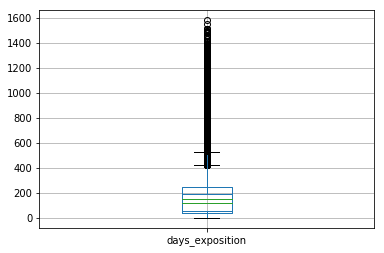

In [50]:
df_av_price.boxplot(column=['days_exposition'])
df_center.boxplot(column=['days_exposition'])

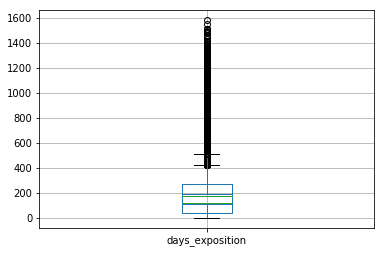

In [51]:
df_av_price.boxplot(column=['days_exposition'])
df_exp.boxplot(column=['days_exposition'])

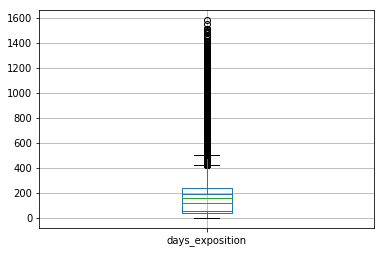

In [52]:
df_av_price.boxplot(column=['days_exposition'])
df_first.boxplot(column=['days_exposition'])

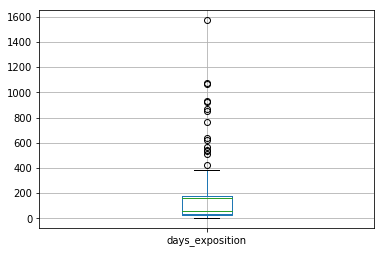

In [53]:
df_studio.boxplot(column=['days_exposition'])
df_apartment.boxplot(column=['days_exposition'])

# Итоги

Основное , что можно заключить - в данном датасете нет одного самого важного параметра, влияющего на цену за кв.метр - год постройки. Мы видим это влияние опосредовано, через тип задания, количество этажей, тип квартир и.т.д. Например, стоимость квартир в высотных зданиях(которые, скорее всего более новые) в среднем выше, также как стоимость студий и аппартаментов.

Расположение квартир токже влияет на стоимость. Причем прослеживается два почти равнозначных фактора - близость к центру и экологичность района - они почти в равной степени влияют на цену. Т.е. кто-то выбирает близко к центру и готов за это платить, кто-то ывбирает наличие парков и водоемов - и также готов за это переплатить.

Также подтвердились извесные факты: что квартиры на первых и последних этажах менее ценятся (до 20 тыс за кв.м.), что за большую кухню также придется заплатить дороже, что за большие квартиры тоже придется отдать больше (за кв. метр).

Есть и другая сторона - дорогие квартиры продаются дольше - в среднем на  2 месяца. Квартиры на первых этажах также продаются дольше на 1,5-2 мес.